# **Market Basket Analysis**

Problem Statement: Our merchandising team wishes to introduce bundles for all products on our website to increase the average basket size when customers make an online purchase. Describe clearly how you will work on this problem, and the insights you can draw from this analysis.

## **1. Overview**

### 1.a. Goal:
- The goal of this experiment is to introduce bundle deals to increase average basket size for online transactions. By offering multiple products at a discounted price, this encourages increase is sales volume and ultimately higher turnover. 

### 1.b. Methodology

- The main methodology I am proposing is to do **A/B testing** based on the selection of products in the analysis. Selection of products for bundling will be based on three main considerations:

   1. **Recommendation System:**
   Utilizing historic transaction data, we will implement a recommendation system to help us identify products that are often purchased together or have a high affinity, making them suitable candidates for bundling.

   2. **Customer Segmentation:**
   We will segment our customer base using various criteria such as demographics, purchase history, and preferences. By understanding the different customer segments, we can identify unique preferences and behaviors, which will guide us in selecting the right products for each segment's bundling strategy.

   3. **Sales of Underperforming Products:**
   Another factor we will consider is the sales performance of individual products. Products that are underperforming or have lower sales may benefit from bundling with more popular items, helping to increase their visibility and sales potential.

- By combining these three considerations, we aim to identify the most suitable products for bundling, which will drive sales volume hence a higher turnover

## **2. Importing libraries and Initial Data Exploration**

In [16]:
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install scikit-learn
# pip install xgboost
# pip install tensorflow
# pip install networkx

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import networkx as nx
import datetime as dt
from heapq import nlargest

In [18]:
#Import the data
df = pd.read_csv("Recruitment_Transactions_ToBeDistributed.csv")

In [19]:
#Sensing of data frame structure and how they are organised
df.head(10)

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
5,6,7-1034-1034-20200712110938-102-7275,2020-07-12 11:09:38,0,NaN,NaN,City Square SG,VP6PDPPUUX,offline,0,0.0
6,7,7-1034-1034-20200727192152-102-9163,2020-07-27 19:21:52,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
7,8,7-1034-1034-20200724113113-102-8745,2020-07-24 11:31:13,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
8,9,7-1034-1034-20200704124211-210-5627,2020-07-04 12:42:11,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
9,10,7-1034-1034-20200712105212-102-7270,2020-07-12 10:52:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0


In [20]:
#Sensing of the variety of data available
df.sample(10)

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
2234122,2234123,7-1979-1979-20200727130735-203-8469,2020-07-27 13:07:35,7266497,SHORTS,FITNESS,Decathlon Holland Village,NaN,offline,4,42.5
2756955,2756956,7-2459-2459-20201222153145-208-4700,2020-12-22 15:31:45,6977268,AQUASHOES,WATERSPORT,Centre Point,NaN,offline,3,22.0
1663516,1663517,7-969-969-20201010214457-210-7298,2020-10-10 21:44:57,1779759,PADDED CYCLING,CYCLING,Bedok SG,H7XUPEYRLZ,offline,2,149.5
5059301,5059302,7-2476-2476-20201028121930-205-9641,2020-10-28 12:19:30,7002356,LANTERN,MOUNTAIN,Tampines Mall,HLFCJ3MTK0,offline,3,53.5
4887584,4887585,7-1871-1871-20201129171546-210-6976,2020-11-29 17:15:46,7253075,BACKPACK,MOUNTAIN,Joo Koon,NaN,offline,7,9.0
1760821,1760822,7-1871-1871-20200905203152-207-448,2020-09-05 20:31:52,1547624,RING,PILATES,Joo Koon,QGDXHY5OC4,offline,4,54.5
2845762,2845763,7-1034-1034-20201203191316-211-2274,2020-12-03 19:13:16,2093118,SHOES,RUNNING,City Square SG,NaN,offline,1,45.5
3791042,3791043,7-1871-1871-20201220204803-206-8395,2020-12-20 20:48:03,7185985,TENNIS BALL,TENNIS,Joo Koon,X2SESADGEY,offline,4,45.5
4962372,4962373,7-2128-2128-20201106230253-207-3542,2020-11-06 23:02:53,7362036,SHORTS,MOUNTAIN,Singapore Lab,DWCQWDHPGI,offline,1,19.5
4918158,4918159,7-2128-2128-20200815180751-211-9057,2020-08-15 18:07:51,7223447,T-SHIRT,MOUNTAIN,Singapore Lab,NaN,offline,3,24.5


In [21]:
#Understanding the object types
df.dtypes

Unnamed: 0                  int64
the_transaction_id         object
the_date_transaction       object
sku_idr_sku                 int64
product_type               object
sports                     object
but_name_business_unit     object
ctm_customer_id            object
the_to_type                object
f_qty_item                  int64
f_to_tax_in               float64
dtype: object

In [22]:
#Number of transactions with 0 items
df[df["f_qty_item"]==0]

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3722056,3722057,7-969-969-20201215111658-102-466,2020-12-15 11:16:58,7204242,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,YFIJRLKU4L,offline,0,0.0
3722066,3722067,7-969-969-20201218220951-101-3168,2020-12-18 22:09:51,7238111,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,NaN,offline,0,0.0
3722071,3722072,7-969-969-20201210111617-102-232,2020-12-10 11:16:17,7204242,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,0421DL3FI1,offline,0,0.0
3722073,3722074,7-969-969-20201210111617-102-232,2020-12-10 11:16:17,7204242,UNDEFINED,WORKSHOP AND SERVICES,Bedok SG,0421DL3FI1,offline,0,0.0


In [23]:
#Number of transactions with 0 turnover
df[df["f_to_tax_in"]==0] 

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
0,1,7-1034-1034-20200708214026-101-8628,2020-07-08 21:40:26,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
1,2,7-1034-1034-20200708164857-211-1734,2020-07-08 16:48:57,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
2,3,7-1034-1034-20200701155410-102-6163,2020-07-01 15:54:10,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
3,4,7-1034-1034-20200713202706-102-7516,2020-07-13 20:27:06,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
4,5,7-1034-1034-20200727160812-211-4800,2020-07-27 16:08:12,0,NaN,NaN,City Square SG,NaN,offline,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4700134,4700135,7-1871-1871-20200728201226-212-9330,2020-07-28 20:12:26,942687,BIKE LIGHT,CYCLING,Joo Koon,K0XZCPR58D,offline,4,0.0
4716977,4716978,7-1979-1979-20200913124602-101-6723,2020-09-13 12:46:02,379525,BELL,CYCLING,Decathlon Holland Village,EW34EC1X35,offline,1,0.0
4751256,4751257,7-2459-2459-20201101102623-102-4537,2020-11-01 10:26:23,942687,BIKE LIGHT,CYCLING,Centre Point,E0YRVOMTHU,offline,3,0.0
4751952,4751953,7-2459-2459-20201002125132-101-958,2020-10-02 12:51:32,7317793,BIKE LIGHT,CYCLING,Centre Point,NaN,offline,4,0.0


In [24]:
#Filter out all transaction rows with 0 items

filtered_df = df[df["f_qty_item"] != 0]
filtered_df = filtered_df[filtered_df["f_to_tax_in"] != 0]

print(f"Number of total rows: {len(df)}")
print(f"Number of filtered rows: {len(filtered_df)}")

Number of total rows: 5496751
Number of filtered rows: 5462787


##### Conclusion for initial data exploration

Generally, data looks cleaned. Objects are of the right format, however, realised that there are 30,013 and 5151 records with 0 quantity and 0 turnover respectively.

## **3. Analysis based on considerations**

In this segment, we will be exploring the three considerations in depth and find potential products that would benefit most from bundling deals.

### 3.a. Recommendation System

- To track the number of items that are bought together in the same transaction, we will implement a graph data structure with each node being one label of the category and the edge will be the relationship between each node. This edge will be weighted based on the number of times the two items have been brought together.

- The two main categories we will look at for this segment is "Sports" and "Product Type". These two categories are on a bigger granular level as compared to individual products. This is done to widen the scope of the bundling, so more products can be included into a single bundle deals. In addition, by including a bundle deal that involves two bigger categories, this will be less confusing and provide customers with more choice when looking for products to bundle with.



Data preparation:

In [25]:
# Select online transactions from the filtered df
online_df = filtered_df[filtered_df["the_to_type"] == "online"]

online_df.head(5)

,Unnamed: 0,the_transaction_id,the_date_transaction,sku_idr_sku,product_type,sports,but_name_business_unit,ctm_customer_id,the_to_type,f_qty_item,f_to_tax_in
475,476,7-2459-2459-20200923214628-102-851,2020-09-23 21:46:28,1718267,NaN,NaN,Website,E1OWOWPT1K,online,5,110.5
670,671,7-1034-1034-20200710102742-117-88,2020-07-10 10:27:42,7206544,WATER BOTTLE BE,RUNNING,Website,ZY8KCYC8O3,online,5,83.5
786,787,7-1034-1034-20200704160615-117-27,2020-07-04 16:06:15,7204924,RUNNING MID TIG,RUNNING,Website,0VX6TTV6ES,online,2,98.5
788,789,7-1034-1034-20200703124109-102-6434,2020-07-03 12:41:09,7231216,WATER BOTTLE BE,RUNNING,Website,OUSGNK1LLA,online,5,48.5
826,827,7-1034-1034-20200803174610-118-52,2020-08-03 17:46:10,7209766,SHORTS,RUNNING,Website,POSTV6OQ9L,online,2,36.5


Graph Functions:

In [26]:
# Function to create the graph for a specific category
def create_graph(data, category):
    G = nx.Graph()
    
    # Group the DataFrame by the given category
    grouped_data = data.groupby(category)

    # Add nodes for each unique value in the category
    for value, group in grouped_data:
        G.add_node(value)

    # Create edges between nodes based on co-occurrence in the same transaction
    for _, group in data.groupby("the_transaction_id"):
        items = set(group[category])
        if len(items) > 1:
            for item1 in items:
                for item2 in items:
                    if item1 != item2:
                        if G.has_edge(item1, item2):
                            G[item1][item2]['weight'] += 1
                        else:
                            G.add_edge(item1, item2, weight=1)
    
    return G

In [27]:
# Function to create a graph with top n edges based on their weights
def create_top_n_graph(df, column, n):
    # Create the initial graph
    graph = create_graph(df, column)

    # Get all the edges and their weights
    edges = [(source, target, attributes['weight']) for source, target, attributes in graph.edges(data=True)]
    
    # Get the top n edges based on their weights
    top_n_edges = nlargest(n, edges, key=lambda item: item[2])
    
    # Create a new graph with only the top n edges
    top_n_graph = nx.DiGraph()
    for source, target, weight in top_n_edges:
        top_n_graph.add_edge(source, target, weight=weight)

    return top_n_graph

In [28]:
def print_top_edges(graph, category):
    print(f"{category}: ")
    for source, target, attributes in graph.edges(data=True):
        weight = attributes['weight']
        print(f"Categories: {source} <-> {target}, Top Weight: {weight}")
    print("")

In [29]:
def print_topn_pairs(df,n,title):
    # Create the three graphs with top n edges
    topn_pt_graph = create_top_n_graph(df, "product_type", n)
    topn_sprts_graph = create_top_n_graph(df, "sports", n)

    # Print the top n edges of each category
    print_top_edges(topn_pt_graph, "Product Type")
    print_top_edges(topn_sprts_graph, "Sports")

    # Draw and visualize the filtered graphs
    plt.figure(figsize=(10, 6))

    plt.subplot(121)
    nx.draw_networkx(topn_pt_graph, with_labels=True, node_size=500, font_size=8)
    plt.title(f"Top {n} Most Similar Product Types")

    plt.subplot(122)
    nx.draw_networkx(topn_sprts_graph, with_labels=True, node_size=500, font_size=8)
    plt.title(f"Top {n} Most Similar Sports Categories")

    plt.suptitle(title)

    plt.tight_layout()
    plt.show()

Overall top 15 pairs for both categories:

Product Type: 
Categories: SHORTS <-> T-SHIRT, Top Weight: 17512
Categories: SHORTS <-> SOCKS, Top Weight: 7054
Categories: SHORTS <-> TANK, Top Weight: 6520
Categories: SHORTS <-> TROUSERS, Top Weight: 3244
Categories: T-SHIRT <-> TANK, Top Weight: 5940
Categories: T-SHIRT <-> TROUSERS, Top Weight: 3950
Categories: SOCKS <-> T-SHIRT, Top Weight: 6326
Categories: LEGGINGS <-> T-SHIRT, Top Weight: 4220
Categories: LEGGINGS <-> SHORTS, Top Weight: 3040
Categories: SHOES <-> T-SHIRT, Top Weight: 4172
Categories: SHOES <-> SHORTS, Top Weight: 3930
Categories: SHOES <-> SOCKS, Top Weight: 3718
Categories: BACKPACK <-> T-SHIRT, Top Weight: 2920
Categories: BOARDSHORTS <-> SHORTS, Top Weight: 2864
Categories: SPORTS BRA <-> T-SHIRT, Top Weight: 2808

Sports: 
Categories: MOUNTAIN <-> RUNNING, Top Weight: 17614
Categories: MOUNTAIN <-> PILATES, Top Weight: 9782
Categories: MOUNTAIN <-> SWIMMING, Top Weight: 8140
Categories: MOUNTAIN <-> SURFING, Top Weight: 7734
Categories: RUNNING <-> SWIMMIN

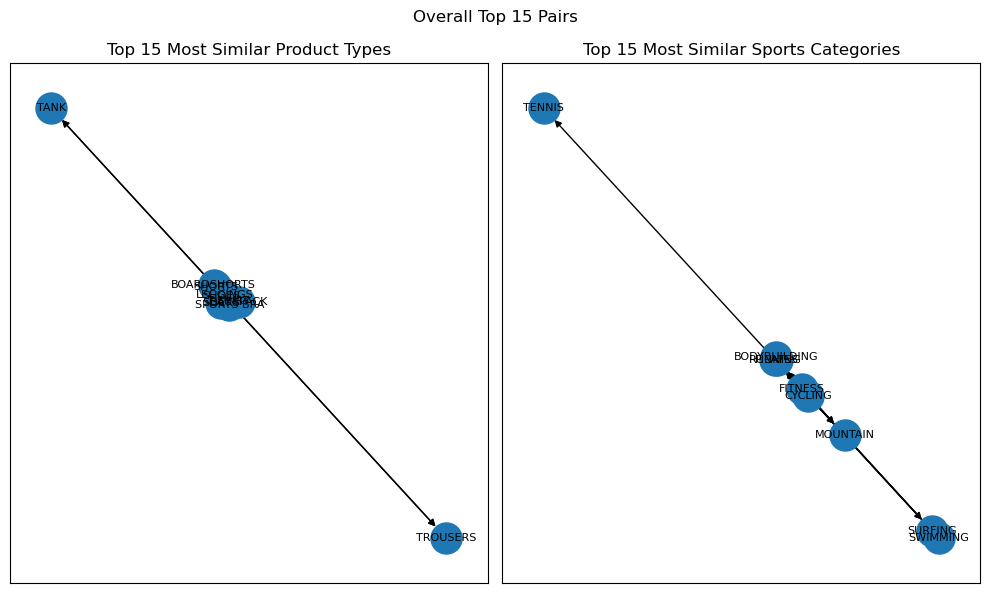

In [30]:
print_topn_pairs(online_df, 15, "Overall Top 15 Pairs")

Conclusion for Recommendation System:
- Product Type:
    - Theres seems to be a very strong relationship between the apparels, with shorts being the most popular to be bought with something else.
    - As these products are all very similar in nature and are bought in bulk, this is a great bundle deal opportunity to capitalise, to have bundle deals to complete their outfit.
- Sports Category:
    - Mountain seems to be the most popular category to be paired up with other products.
    - Mountain, Running and Swimming are all popular categories, perhaps there can a triathalon bundle promotion.

### 3.b. Customer Segmentation

- By implementing a study on the customer profile, we can identify the types of customers and the types of products that have higher affliation. The main groups we will focus in for this segment will be:

    1. High Value Customer
    2. Loyal Customer
    3. Churned Customer
    4. Non-members

- To engage each group effectively, a study on the popular types of products each group, will add an additional layer on top of marketing strategies placed on them.

#### 3.b.i. Categorising of Customer

- The first level of filter will be to remove all non-members by selecting all NULL customer ID of each transaction. 
- For members, I will using the Recency, Frequency and Monetary (RFM) model.
    - Definitions:
        - Recency: Amount of time since the customer's last purchase.
        - Frequency: Number of times a customer made a purchase.
        - Monetary: Total amount of money spent.
    - Categorisation and strategy:
        - High value customer: Highest tier, exclusive bundle deals on popular products to retain them and attract others to join this group.
        - Loyal customer: Middle tier, bundle deals to encourage these members to spend more. 
        - Churn customer: Lowest tier, time sensitive bundle deals can be used to attract these customers back.


In [31]:
# Selecting non members and members data
non_mem_df = online_df[online_df["ctm_customer_id"].isnull()]
mem_df = online_df[online_df["ctm_customer_id"].notnull()]

In [32]:
# Calculating RFM for each customer

# Calculate Recency (R) for each customer
recency_df = mem_df.groupby('ctm_customer_id')['the_date_transaction'].max().reset_index()
recency_df['recency'] = (pd.to_datetime('2020-12-31') - pd.to_datetime(recency_df['the_date_transaction'])).dt.days
recency_df.drop("the_date_transaction", axis=1, inplace=True)

# Calculate Frequency (F) for each customer
frequency_df = mem_df.groupby('ctm_customer_id')['the_transaction_id'].nunique().reset_index()
frequency_df.rename(columns={'the_transaction_id': 'frequency'}, inplace=True)

# Calculate Monetary (M) for each customer
monetary_df = mem_df.groupby('ctm_customer_id')['f_to_tax_in'].sum().reset_index()
monetary_df.rename(columns={'f_to_tax_in': 'monetary'}, inplace=True)

# Merge RFM values into a single DataFrame
rfm_df = pd.merge(recency_df, frequency_df, on='ctm_customer_id')
rfm_df = pd.merge(rfm_df, monetary_df, on='ctm_customer_id')

rfm_df

,ctm_customer_id,recency,frequency,monetary
0,000R842PBV,139,1,319.2
1,00184MJF8U,43,1,42.0
2,001KZ426EU,95,1,111.0
3,001Q7A871S,145,3,198.0
4,001ZACJ0RV,95,1,44.0
...,...,...,...,...
120530,ZZXEFUVRR4,68,1,36.0
120531,ZZYEJICOGM,73,2,783.5
120532,ZZYXDEMNVG,159,1,230.8
120533,ZZZPD2IMD6,128,1,237.5


In [33]:
# Threshold for RFM
recency_threshold = 90  # Customers with recency <= 90 days are considered "Recent"
frequency_threshold = 3  # Customers with frequency >= 3 transactions are considered "Loyal"
monetary_threshold = 1000  # Customers with monetary >= $1000 are considered "High Value"

# Segments the customer based on threshold
def get_customer_segment(r, f, m):
    if r <= recency_threshold and f >= frequency_threshold and m >= monetary_threshold:
        return "High Value Customer"
    elif f >= frequency_threshold:
        return "Loyal Customer"
    else:
        return "Churned Customer"

# Apply the function to create the 'segment' column in the RFM DataFrame
rfm_df['segment'] = rfm_df.apply(lambda row: get_customer_segment(row['recency'], row['frequency'], row['monetary']), axis=1)

print(f"Non Member: {len(non_mem_df)}")
for ele, num in rfm_df['segment'].value_counts().items():
    print(f"{ele}: {num}")

Non Member: 3363
Churned Customer: 105185
Loyal Customer: 11660
High Value Customer: 3690


In [34]:
#Use the RFM data and label the original df
rfm_mem_df = mem_df.merge(rfm_df, on="ctm_customer_id", how="left")

# Split the transactions data based on customer segmentation
high_mem_df = rfm_mem_df[rfm_mem_df['segment'] == "High Value Customer"]
loyal_mem_df = rfm_mem_df[rfm_mem_df['segment'] == "Loyal Customer"]
churned_mem_df = rfm_mem_df[rfm_mem_df['segment'] == "Churned Customer"]

#### 3.b.ii. Popular products to engage High Value Customers

Product Type: 
Categories: SHORTS <-> T-SHIRT, Top Weight: 2818
Categories: SHORTS <-> SOCKS, Top Weight: 1190
Categories: SHORTS <-> TANK, Top Weight: 1130
Categories: T-SHIRT <-> TANK, Top Weight: 1154
Categories: SOCKS <-> T-SHIRT, Top Weight: 1138

Sports: 
Categories: MOUNTAIN <-> RUNNING, Top Weight: 3082
Categories: CYCLING <-> RUNNING, Top Weight: 2786
Categories: CYCLING <-> MOUNTAIN, Top Weight: 2272
Categories: FITNESS <-> RUNNING, Top Weight: 1794
Categories: PILATES <-> RUNNING, Top Weight: 1682



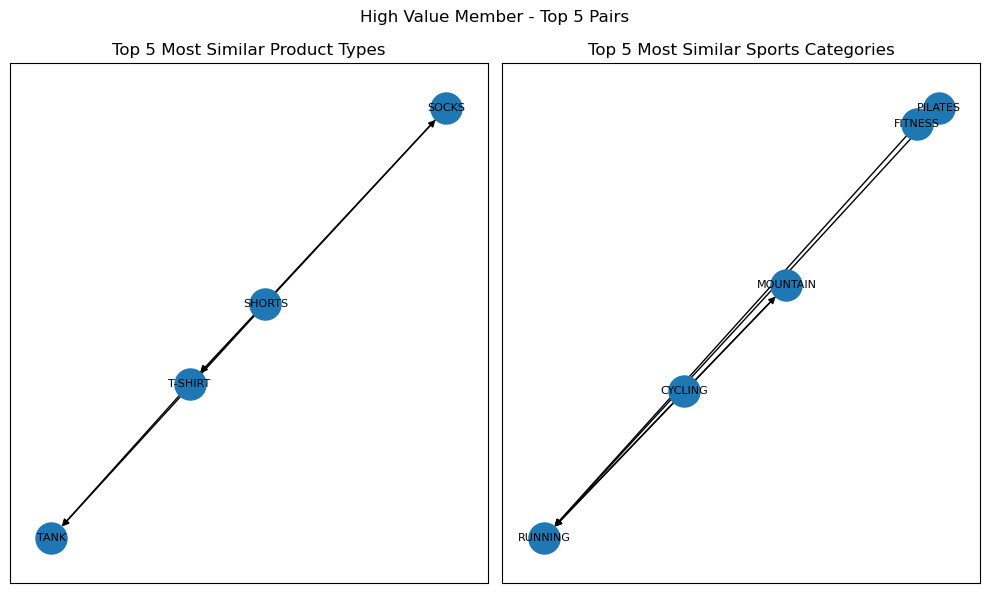

In [35]:
print_topn_pairs(high_mem_df, 5, "High Value Member - Top 5 Pairs")

#### 3.b.iii. Popular products to engage Loyal Customers

Product Type: 
Categories: SHORTS <-> T-SHIRT, Top Weight: 2848
Categories: SHORTS <-> SOCKS, Top Weight: 1022
Categories: SHORTS <-> TANK, Top Weight: 1022
Categories: T-SHIRT <-> TANK, Top Weight: 936
Categories: SOCKS <-> T-SHIRT, Top Weight: 834

Sports: 
Categories: MOUNTAIN <-> RUNNING, Top Weight: 2798
Categories: CYCLING <-> RUNNING, Top Weight: 2256
Categories: CYCLING <-> MOUNTAIN, Top Weight: 1924
Categories: FITNESS <-> RUNNING, Top Weight: 1862
Categories: PILATES <-> RUNNING, Top Weight: 1516



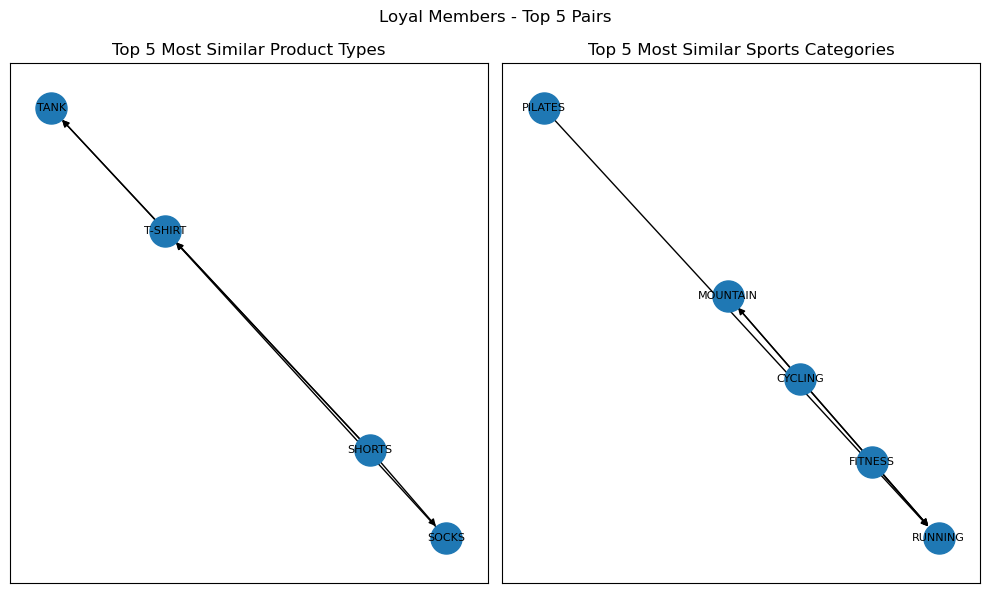

In [36]:
print_topn_pairs(loyal_mem_df, 5, "Loyal Members - Top 5 Pairs")

#### 3.b.iv. Popular products to engage Churned Customers

Product Type: 
Categories: SHORTS <-> T-SHIRT, Top Weight: 11810
Categories: SHORTS <-> SOCKS, Top Weight: 4824
Categories: SHORTS <-> TANK, Top Weight: 4356
Categories: T-SHIRT <-> TANK, Top Weight: 3838
Categories: SOCKS <-> T-SHIRT, Top Weight: 4336

Sports: 
Categories: MOUNTAIN <-> RUNNING, Top Weight: 11690
Categories: FITNESS <-> RUNNING, Top Weight: 9292
Categories: CYCLING <-> RUNNING, Top Weight: 8906
Categories: CYCLING <-> MOUNTAIN, Top Weight: 7190
Categories: PILATES <-> RUNNING, Top Weight: 7822



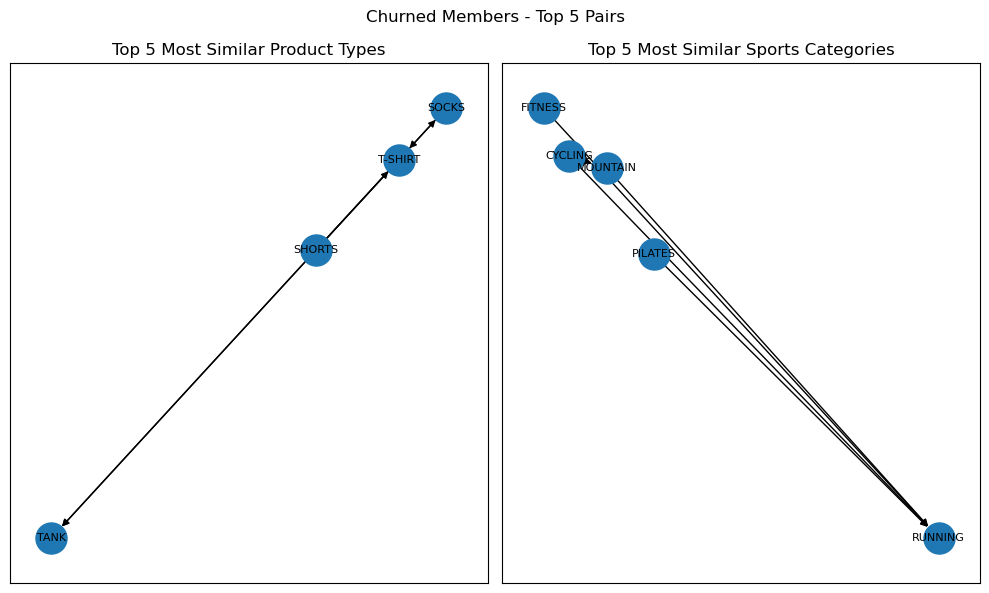

In [37]:
print_topn_pairs(churned_mem_df, 5, "Churned Members - Top 5 Pairs")

#### 3.b.v. Popular products to engage Non-Member Customers

Product Type: 
Categories: SHORTS <-> T-SHIRT, Top Weight: 36
Categories: SHORTS <-> SOCKS, Top Weight: 18
Categories: SHORTS <-> TOP, Top Weight: 12
Categories: SHORTS <-> TANK, Top Weight: 12
Categories: SOCKS <-> T-SHIRT, Top Weight: 18

Sports: 
Categories: CYCLING <-> RUNNING, Top Weight: 46
Categories: CYCLING <-> MOUNTAIN, Top Weight: 42
Categories: MOUNTAIN <-> RUNNING, Top Weight: 44
Categories: MOUNTAIN <-> PILATES, Top Weight: 30
Categories: PILATES <-> RUNNING, Top Weight: 36



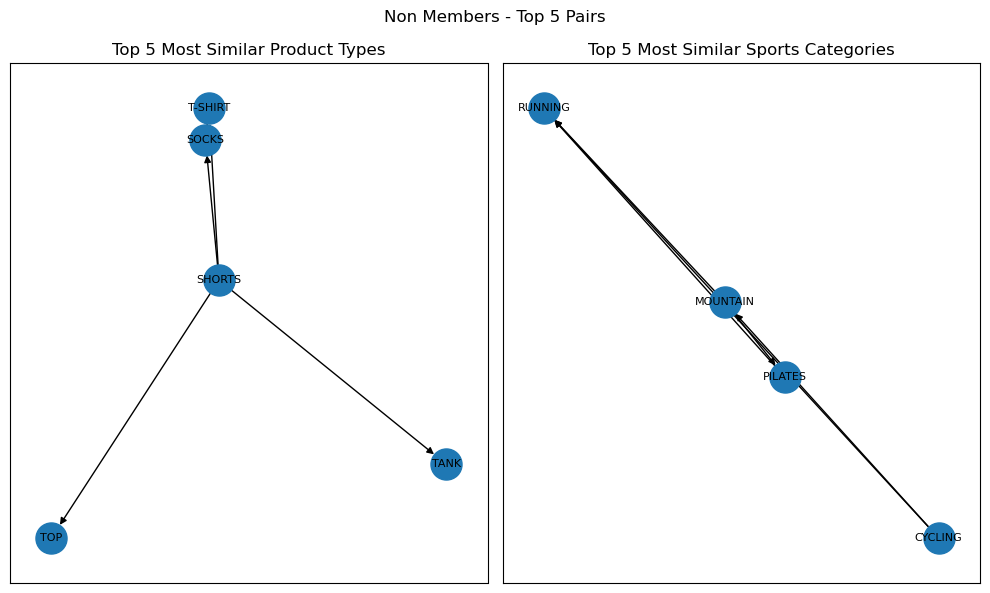

In [38]:
print_topn_pairs(non_mem_df, 5, "Non Members - Top 5 Pairs")

#### 3.b.vi. Conclusion of Customer Segmentation
- Across all customer segmentation, the pairings of categories are all extremely similar, hence these items are valued and seen as complementary across the board
- The bundling deal will potentially have the most impact on non members as the pair counts are very low.
    - This means that many of the non members are only purchasing one item per transaction.
    - This is low relative to high value customers as there are around 3000+ customers in each category but the pair counts have a very big difference.
    - This also means that high value customers are already bought in with the concept of buying multiple items in each transaction. Hence, bundling popular items, will benefit them more and create incentive to buy more.

### 3.c. Sales of underperforming products

- Sports categories and product types will be evaluated by the total sum of turnover generated. There will be two baskets, the worst performing 20% and best performing 20%. The graph structure will be used to identify any potential relationship between two categories. By bundling with popular products, this increases exposure to underperforming products.

Graph function for best worst pairs:

In [39]:
def evaluate_categories(df):
    # Calculate the total sum of turnover for each sports category and product type
    category_turnover = df.groupby(['sports'])['f_to_tax_in'].sum()
    product_type_turnover = df.groupby(['product_type'])['f_to_tax_in'].sum()

    # Calculate the 20% cutoff values for best and worst performing categories
    category_low_cutoff = category_turnover.quantile(0.2)
    category_high_cutoff = category_turnover.quantile(0.8)
    product_type_low_cutoff = product_type_turnover.quantile(0.2)
    product_type_high_cutoff = product_type_turnover.quantile(0.8)

    # Create two baskets for best and worst performing categories
    best_performing_categories = category_turnover[category_turnover >= category_high_cutoff].index.tolist()
    worst_performing_categories = category_turnover[category_turnover <= category_low_cutoff].index.tolist()

    best_performing_product_types = product_type_turnover[product_type_turnover >= product_type_high_cutoff].index.tolist()
    worst_performing_product_types = product_type_turnover[product_type_turnover <= product_type_low_cutoff].index.tolist()

    return best_performing_categories, worst_performing_categories, best_performing_product_types, worst_performing_product_types

# Assuming your DataFrame is named df, call the function like this:
best_sports, worst_sports, best_product_types, worst_product_types = evaluate_categories(online_df)

In [40]:
best_worst_sports_df = online_df[online_df["sports"].isin(best_sports) | online_df["sports"].isin(worst_sports)]
best_worst_product_type_df = online_df[online_df["product_type"].isin(best_product_types) | online_df["product_type"].isin(worst_product_types)]

# Function to create a graph with top n edges based on their weights
def create_top_n_best_worst_graph(df, column, n, best, worst):
    # Create the initial graph
    graph = create_graph(df, column)

    # Get all the edges and their weights
    edges_full = [(source, target, attributes['weight']) for source, target, attributes in graph.edges(data=True)]
    
    edges = []
    for source,target,w in edges_full:
        if (source in best and target in worst) or (target in best and source in worst):
            edges.append((source, target, w))
    
    # Get the top n edges based on their weights
    top_n_edges = nlargest(n, edges, key=lambda item: item[2])
    
    # Create a new graph with only the top n edges
    top_n_graph = nx.DiGraph()
    for source, target, weight in top_n_edges:
        top_n_graph.add_edge(source, target, weight=weight)

    return top_n_graph

def print_topn_best_worst_pairs(df,n,title,best_sports,worst_sports,best_product_types,worst_product_types):
    # Create the three graphs with top n edges
    topn_pt_graph = create_top_n_best_worst_graph(df, "product_type", n, best_product_types, worst_product_types)
    topn_sprts_graph = create_top_n_best_worst_graph(df, "sports", n, best_sports, worst_sports)

    # Print the top n edges of each category
    print_top_edges(topn_pt_graph, "Product Type")
    print_top_edges(topn_sprts_graph, "Sports")

    # Draw and visualize the filtered graphs
    plt.figure(figsize=(10, 6))

    plt.subplot(121)
    nx.draw_networkx(topn_pt_graph, with_labels=True, node_size=500, font_size=8)
    plt.title(f"Top {n} Most Similar Product Types")

    plt.subplot(122)
    nx.draw_networkx(topn_sprts_graph, with_labels=True, node_size=500, font_size=8)
    plt.title(f"Top {n} Most Similar Sports Categories")

    plt.suptitle(title)

    plt.tight_layout()
    plt.show()

Best Worst Top 15 Pairs:


Product Type: 
Categories: BUN KIT <-> TIGHTS, Top Weight: 48
Categories: BUN KIT <-> SPORTS BAG, Top Weight: 34
Categories: BUN KIT <-> T-SHIRT, Top Weight: 20
Categories: BUN KIT <-> SHORTS, Top Weight: 20
Categories: BUN KIT <-> SKIRT, Top Weight: 16
Categories: BUN KIT <-> SOCKS, Top Weight: 16
Categories: BUN KIT <-> SWIMMING GOGGLE, Top Weight: 14
Categories: BALL MARKER <-> GOLF BALL, Top Weight: 30
Categories: BALL MARKER <-> SHORT-SLEEVED P, Top Weight: 14
Categories: BALL MARKER <-> TOWEL, Top Weight: 14
Categories: GOLF BALL <-> PUTTER HEAD COV, Top Weight: 14
Categories: COMPRESSION SUP <-> SHORTS, Top Weight: 24
Categories: JIG HEAD <-> SET, Top Weight: 18
Categories: BLADE CLEANER <-> TABLE TENNIS BA, Top Weight: 16
Categories: REFLECTOR <-> STAND, Top Weight: 14

Sports: 
Categories: MOUNTAIN <-> SKI, Top Weight: 430
Categories: MOUNTAIN <-> TEAMSPORT, Top Weight: 314
Categories: RUNNING <-> TEAMSPORT, Top Weight: 396
Categories: RUNNING <-> SKI, Top Weight: 274
Categori

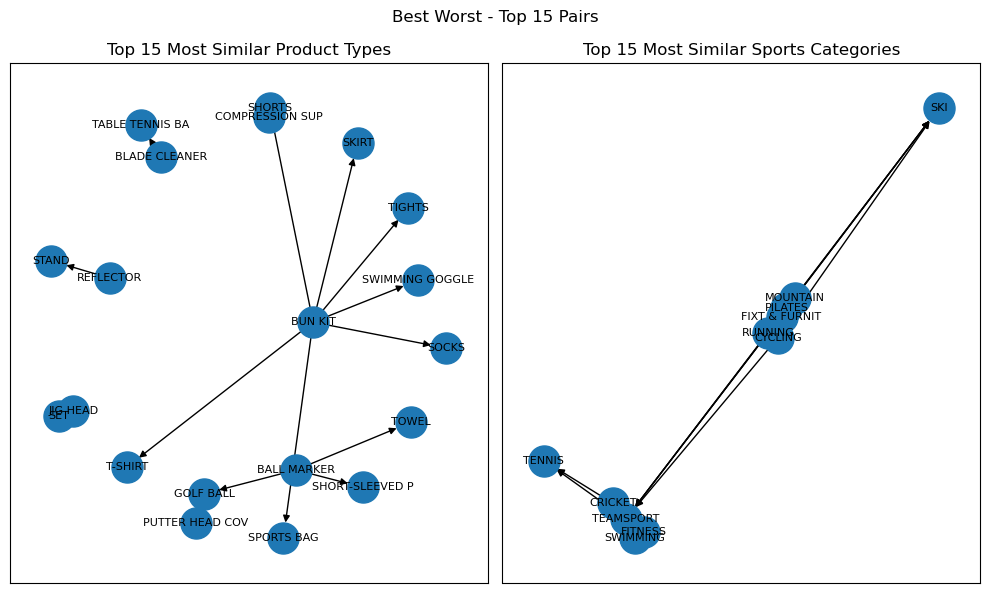

In [41]:
print_topn_best_worst_pairs(online_df, 15, "Best Worst - Top 15 Pairs", best_sports, worst_sports, best_product_types, worst_product_types)

#### Conclusion for Best Worst Pairs:
- For product types:
    - Bun Kit and Ball Marker are underperforming products that will benefit from bundling with popular products as custonmers are already purchasing them together.
- For sports category:
    - Team Sports and Ski are sports that have underperforming products and being paired with Mountain or Running will definitely help to boost sales.

## **4. A/B Testing**

For each bundle deal, they will go through A/B testing of 2 weeks to evaluate the effectiveness of the bundle deal.

### 4.a. Problem Statement
- To test if a bundle deal if well received by online customers, measured by average sum of turnover generated over 2 weeks.

### 4.b. Hypothesis Testing

- Null hypothesis: The average sum of turnover per day per user between having bundle deals and no bundle deals are the same.
- Alternative hypothesis: The average sum of turnover per day per user between having bundle deals is higher than no bundle deals.

- Significance Level: 0.05 (Reject null hypothesis if P-value is less than 5%)

### 4.c. Power Analysis to determine Statistical Power

In [42]:
# Calculate the average transaction per day
df['the_date_transaction'] = pd.to_datetime(df['the_date_transaction'])
transactions_per_day = online_df.groupby(df['the_date_transaction'].dt.date)['the_transaction_id'].count()
average_transactions_per_day = transactions_per_day.mean()

turnover_mean_per_transaction = online_df.groupby(df['the_transaction_id'])['f_to_tax_in'].mean()
average_turnover_mean_per_transaction = turnover_mean_per_transaction.mean()

turnover_std_per_transaction = online_df.groupby(df['the_transaction_id'])['f_to_tax_in'].std()
average_turnover_std_per_transaction = turnover_std_per_transaction.mean()

print(f"Average Transactions per Day: {average_transactions_per_day}")
print(f"Mean: {average_turnover_mean_per_transaction}")
print(f"Standard Deviation: {average_turnover_std_per_transaction}")

Average Transactions per Day: 2900.478260869565
Mean: 90.13575127759887
Standard Deviation: 50.45466183050442


#### 4.c.i. Inputs for Power Analysis:
- Due to the limitation on traffic and hence sample size, Power Analysis will be done to see the statistical power.
    - Take average traffic to be slightly lower at 25,000 split between treatment and control:
        - Sample Size = 12,500
- Set Cohen's effect size, d = 0.5
    - The closer d is to 0, the lesser effect there is.
- Minimum Detectable Effect: 0.01
    - Smallest effect size that you want your study to have enough statistical power to detect
- Superiority margin: 0.01 
    - Practical significance or meaningfulness of the effect that you are trying to detect

#### 4.c.ii. Conclusion for Power Analysis:
- Using a statistical calculator: Statistical Power = 5.42%
    - https://www.gigacalculator.com/calculators/power-sample-size-calculator.php?calcType=pow&eType=groups&type=cont&sType=cont&hyp=sup&diffType=abs&alpha=0.05&power=0.90&groups=1&ratio=1&inputType=prop&ssize=125000&prop=&mean=50.45466183050442&stdev=90.13575127759887&sinputType=prop&effect=0.01&margin=0.01
    - This is extremely low, and the few ways to increase it are:
        - Use a bigger sample size, customers browsing the web instead of those who have checked out.
        - Adjust significance to be higher at the risk of higher Type 1 error (False Positives Rate)

### 4.d. Implementation

- Considering the user journey, the optimal stage to introduce bundle deals is after an item has been added to the cart.
    - This is done to prevent over complication (ie having too many deals/prices).
    - By relying on products the customers are already going to buy, this does not disrupt the customer's default journey and only add an additional option after an item been added to the cart.
- This experiment is done over the span of 2 weeks.
    - This is to prevent a day of week effect, where weekends have more traffic and sales.
    - An additional consideration to not have it over any Holidays, additional sales or events such as a major triathalon.
- Ensure that there is a good mix of customers from each customer segmentation as they have varying spending habits. 

### 4.e. Launch Decision

After the two weeks, and consolidation of data, compare the P-value to our Minimum Detectable Effect, Superiority Margin and Significance level to see if there is enough evidence to reject the null hypothesis.
- The cost of launching should also be taken into consideration, such as the amount of discount per bundle.

### 4.f. Limitations and Caveats

1. While turnover serves as a valuable metric for assessing sales performance, it's essential to consider that higher-priced items, such as bicycles, can heavily influence the overall turnover due to their significant revenue contribution. To obtain a more nuanced understanding of product popularity, it's prudent to account for the product's price. By normalizing turnover based on the product price, we can gain insights into popularity relative to the cost, enabling a fairer comparison across all products. However, this will be done at the expense of not focusing on high sales product.

2. To create effective bundling deals that cater to all products, a comprehensive and detailed study is imperative. This study can delve beyond broad categories and explore the intricate relationships between individual products. By understanding which products are frequently purchased together, we can develop well-targeted bundling strategies that resonate with customer preferences, maximizing sales and enhancing overall customer satisfaction.

## 5. **Conclusion and Business Insights for Market Basket Analysis**

**1. Based on the analysis done with the three considerations:**
   1. **Recommendation System:**
      - The company can implement a recommendation system that suggests apparels to customers based on their purchase history and preferences. This will increase the likelihood of customers purchasing additional items.
      - The company should focus on marketing and promoting products related to popular sports categories such as Mountain, Running, and Swimming, as they have a strong relationship with each other and are likely to be purchased together.
   2. **Customer Segmentation:**
      - Non-members represent a potential opportunity for the company to introduce bundle deals and encourage multiple product purchases. By offering attractive bundle deals, the company can motivate non-members to make more purchases.
      - High-value members, who already show a tendency to buy in bulk, can be targeted with special bundle deals and exclusive offers. This can help in increasing their loyalty and overall spending.
   3. **Sales of Underperforming Products:**
      - Underperforming products like Bun Kit and Ball Marker can be bundled with popular products to boost their sales. This strategy leverages the fact that customers are already purchasing these products together and can be enticed to make additional purchases with bundle deals.
      - Pairing underperforming sports categories like Team Sports and Ski with popular sports categories like Mountain or Running can help to attract more customers and improve the sales of these underperforming categories.

**2. A/B Testing:**
- Implement A/B testing for each bundle deal and measure the average turnover per day per customer as the success metric. This will allow the company to evaluate the effectiveness of each bundle deal and make data-driven decisions.
- Due to the small sample size and high variability in the data, it is important to carefully consider the statistical power of the experiments. Consider running the experiments for a sufficient duration and account for external factors like holidays or sports events that may influence the results.

Moving forward, 
- The company can implement personalized marketing campaigns based on the recommendation system to target individual customers. By tailoring product recommendations to each customer's interests, they can enhance customer engagement and increase the chances of conversion. Additionally, using customer segmentation analysis, the company can identify high-value members and offer them exclusive upselling and cross-selling opportunities, boosting average order value and revenue. Moreover, creating promotional events and limited-time offers that bundle underperforming products with popular items can drive sales and create a sense of urgency for customers to make purchases.
- While focusing on attracting new customers through A/B testing and marketing campaigns, it is equally important to implement customer retention strategies. Loyalty programs, VIP benefits, and personalized discounts for repeat customers can foster brand loyalty and encourage customer retention.

By implementing these recommendations and conducting A/B testing, Decathalon can make informed decisions to improve customer satisfaction, increase sales, and drive business growth.